---
# Part 2 of Practical Stats for Data Scientists, reworked for Python
---

This notebook assumes that the datasets referenced in Stats4DS.ipynb have been loaded.

The notebook picks up at Chapter 5 Logistics Regression

---
## Introduction

### Imports 

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn.linear_modelc
import sklearn.metrics
import sklearn.feature_selection
import statsmodels.api as sm
from scipy import stats

D:\Anaconda3\envs\root36\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Dataset Load

In [3]:
loans_df = pd.read_csv('data/loan_data.csv', index_col=0)

In [4]:
loans_df.head()

,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,home_ownership,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,RENT,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,OWN,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,RENT,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,RENT,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,RENT,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55


In [5]:
loans_df.shape

(45342, 20)

In [6]:
pd.unique(loans_df['outcome'])

array(['default', 'paid off'], dtype=object)

In [7]:
loans_df['outcome'].describe()

count        45342
unique           2
top       paid off
freq         22671
Name: outcome, dtype: object

---
## Work through a very simple logistic regression example using sklearn

Original Shape of X:  (100,)
Final shape of X:  (100, 1)


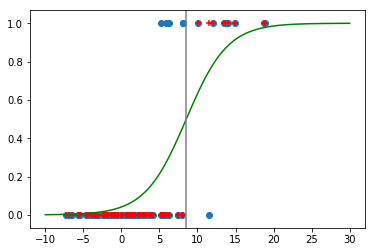

In [8]:
def logit(x):
    '''
    Computes logistic function
    
    Parameters:
    x : float
    
    Returns:
    1/(1+exp(-x))
    '''
    return 1.0 / (1.0+np.exp(-x))
#end logit

# X will be our exogenous variable

n_samples = 100
X = 2.0*np.random.normal(size=n_samples)

# if X > 0, set to 1
y = (X > 2.0).astype(np.float)

# stretch out the X values > 1
X[X>0.0] *= 4.0

# add measurement noise to X values
X += 2*np.random.normal(size=n_samples)
print('Original Shape of X: ' , X.shape)

X = X[:,np.newaxis]
print('Final shape of X: ', X.shape)

# create model
log_model = sklearn.linear_model.LogisticRegression()

# fit model parameters to data
log_model.fit(X, y)

# get predictions for measured X values
y2 = log_model.predict(X)

x3 = np.linspace(-10, 30, 200)

y3 = logit(x3*log_model.coef_ + log_model.intercept_)
y3 = y3.reshape(x3.shape)

plt.scatter(X, y)
plt.scatter(X, y2, color='r', marker='+')
plt.plot(x3, y3, color='g', linestyle='-')
plt.axvline(x=-log_model.intercept_/log_model.coef_, color='.5' )

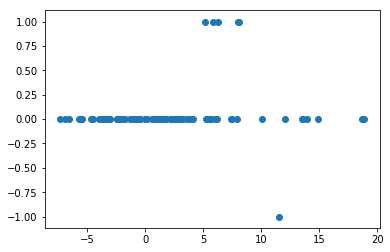

In [9]:
plt.scatter(X, y-y2)

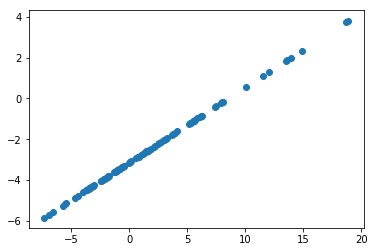

In [10]:
df = log_model.decision_function(X)
plt.scatter(X, df)

In [11]:
[d for d,diff in zip(df, y-y2) if np.abs(diff)>0.5]

[-0.17964563714441084,
 -0.8360525180087142,
 -1.2371793996435947,
 1.113956784284181,
 -0.979990814126614,
 -0.16931199503520578]

In [12]:
log_model.coef_

array([[0.36863655]])

In [13]:
log_model.intercept_

array([-3.14367811])

In [14]:
log_model.score(X, y)

0.94

In [15]:
# now fit a logistic model

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

X2 = sm.add_constant(X)
logit_model = sm.Logit(y, X2)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.132589
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sun, 08 Apr 2018   Pseudo R-squ.:                  0.6568
Time:                        19:12:33   Log-Likelihood:                -13.259
converged:                       True   LL-Null:                       -38.639
                                        LLR p-value:                 1.044e-12
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.3315      1.294     -4.119      0.000      -7.869      -2.794
x1             0.6415      0.

In [16]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.657     
Dependent Variable: y                AIC:              30.5179   
Date:               2018-04-08 19:12 BIC:              35.7282   
No. Observations:   100              Log-Likelihood:   -13.259   
Df Model:           1                LL-Null:          -38.639   
Df Residuals:       98               LLR p-value:      1.0441e-12
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     9.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
const     -5.3315     1.2945   -4.1187   0.0000   -7.8686   -2.7944
x1         0.6415     0.1828    3.5091   0.0004    0.2832    0.9998
=================================================================

"""

In [17]:
c0=-5.2295
c1=0.5717

In [18]:
y4 = logit(x3*c1 + c0)

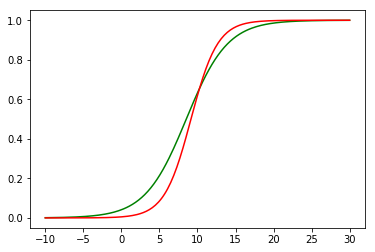

In [19]:
plt.plot(x3,y3, color='g')
plt.plot(x3,y4, color='r')

In [20]:
aa = result.params

In [21]:
sm.show_versions()


INSTALLED VERSIONS
------------------
Python: 3.6.3.final.0

Statsmodels

Installed: 0.8.0 (D:\Anaconda3\envs\root36\lib\site-packages\statsmodels)

Required Dependencies

cython: 0.27.3 (D:\Anaconda3\envs\root36\lib\site-packages\Cython)
numpy: 1.14.1 (D:\Anaconda3\envs\root36\lib\site-packages\numpy)
scipy: 1.0.0 (D:\Anaconda3\envs\root36\lib\site-packages\scipy)
pandas: 0.22.0 (D:\Anaconda3\envs\root36\lib\site-packages\pandas)
    dateutil: 2.6.1 (D:\Anaconda3\envs\root36\lib\site-packages\dateutil)
patsy: 0.4.1 (D:\Anaconda3\envs\root36\lib\site-packages\patsy)

Optional Dependencies

matplotlib: 2.1.0 (D:\Anaconda3\envs\root36\lib\site-packages\matplotlib)
cvxopt: Not installed

Developer Tools

IPython: 6.2.1 (D:\Anaconda3\envs\root36\lib\site-packages\IPython)
    jinja2: 2.9.6 (D:\Anaconda3\envs\root36\lib\site-packages\jinja2)
sphinx: 1.6.5 (D:\Anaconda3\envs\root36\lib\site-packages\sphinx)
    pygments: 2.2.0 (D:\Anaconda3\envs\root36\lib\site-packages\pygments)
nose: 1.3.

---
## Simple parameter selection example

Create exogenous data sets x1 ... x4, and a dependent variable y, depending only on x1, x2

In [22]:
n_samples = 100
x1 = 2.0*np.random.normal(size=n_samples)
x2 = 3.0*np.random.normal(size=n_samples)
x3 = 1.0*np.random.normal(size=n_samples)
x4 = 5.0*np.random.normal(size=n_samples)

# y depends on x1, x2 only

y = [1 if v1>-0.5 and v2>0 else 0 for v1, v2 in zip(x1, x2)]

Create a DataFrame for convenience

In [23]:
ex_df = pd.DataFrame(data = {'y':y, 'x1':x1, 'x2':x2, 'x3':x3, 'x4':x4})

Graphical representation of dependence

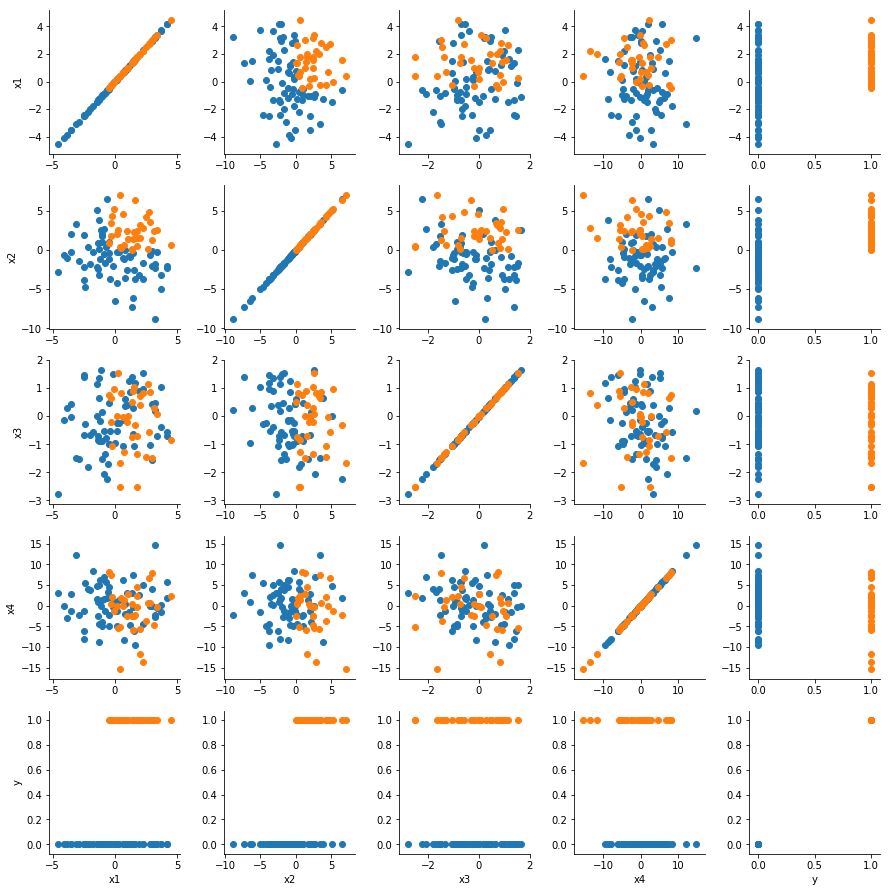

In [24]:
g = sns.PairGrid(ex_df, hue="y")
g.map(plt.scatter)

### Prune estimators to best set

In [69]:
logreg = sklearn.linear_model.LogisticRegression()
X = ['x1', 'x2', 'x3', 'x4']

#  prune estimators down to 1;  the y input parameter is expected to be a 1D array
for n_estimators in range(4,0,-1):
    print('Using {0} estimators'.format(n_estimators))
    rfe = sklearn.feature_selection.RFE(logreg, n_estimators)
    rfe = rfe.fit(ex_df[X], ex_df['y'].values.ravel())
    print('feature count = ', rfe.n_features_)
    print([name for name,flag in zip(X, rfe.support_) if flag])
    print(rfe.score(ex_df[X], ex_df['y']))
#end for

Using 4 estimators
feature count =  4
['x1', 'x2', 'x3', 'x4']
0.87
Using 3 estimators
feature count =  3
['x1', 'x2', 'x3']
0.86
Using 2 estimators
feature count =  2
['x1', 'x2']
0.87
Using 1 estimators
feature count =  1
['x2']
0.76


Choose 2 estimators

In [26]:

n_estimators = 2

print('Using {0} estimators'.format(n_estimators))
rfe = sklearn.feature_selection.RFE(logreg, n_estimators)
rfe = rfe.fit(ex_df[X], ex_df['y'].values.ravel())
print('feature count = ', rfe.n_features_)
print([name for name,flag in zip(X, rfe.support_) if flag])
print(rfe.score(ex_df[X], ex_df['y']))

Using 2 estimators
feature count =  2
['x1', 'x2']
0.87


### Predict y values to assess type 1 and type 2 errors

In [27]:
y_pred = rfe.predict(ex_df[X])
sklearn.metrics.confusion_matrix(ex_df['y'], y_pred)

array([[61,  6],
       [ 7, 26]], dtype=int64)

### Fit the model again, and print out some results

In [28]:
# create model
log_model = sklearn.linear_model.LogisticRegression()

# fit model parameters to data
log_model.fit(ex_df[['x1','x2']], ex_df['y'])

# get predictions for measured X values
y2 = log_model.predict(ex_df[['x1','x2']])

In [29]:
log_model.coef_

array([[0.76834194, 0.8387876 ]])

In [30]:
log_model.intercept_

array([-1.68082064])

In [31]:
def logit(x):
    '''
    Computes logistic function
    
    Parameters:
    x : float
    
    Returns:
    1/(1+exp(-x))
    '''
    return 1.0 / (1.0+np.exp(-x))
#end logit

c1 = log_model.coef_[0][0]
c2 = log_model.coef_[0][1]
c0 = log_model.intercept_[0]

y2 = [ logit(c1*v1 + c2*v2 + c0) for v1, v2 in zip(ex_df['x1'], ex_df['x2'])]

In [41]:
print(c0, c1, c2)

-1.6808206352647275 0.7683419388314129 0.838787597766184


Plot the predicted vs the actual for each point

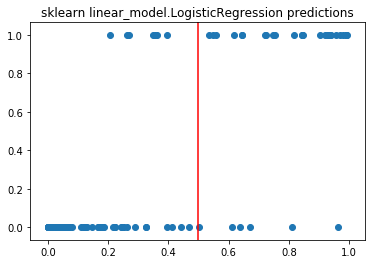

In [68]:
plt.scatter(y2, ex_df['y'] )
plt.title('sklearn linear_model.LogisticRegression predictions')
plt.axvline(0.5, color='r')

### Now, use statsmodels

In [37]:
# now fit a logistic model

from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

X2 = sm.add_constant(ex_df[['x1', 'x2']])
logit_model = sm.Logit(ex_df['y'], X2)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.303519
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       97
Method:                           MLE   Df Model:                            2
Date:                Sun, 08 Apr 2018   Pseudo R-squ.:                  0.5214
Time:                        19:15:35   Log-Likelihood:                -30.352
converged:                       True   LL-Null:                       -63.418
                                        LLR p-value:                 4.362e-15
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1279      0.501     -4.246      0.000      -3.110      -1.146
x1             0.9463      0.

In [38]:
y3 = logit_model.predict(result.params)

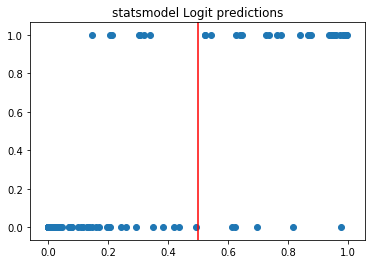

In [70]:
plt.scatter(y3, ex_df['y'])
plt.axvline(0.5, color='r')
plt.title('statsmodel Logit predictions');

### Plot the line dividing the x1, x2 plane into the two regions, from the statsmodel regression

Text(0.5,1,'statsmodels logistic regression line')

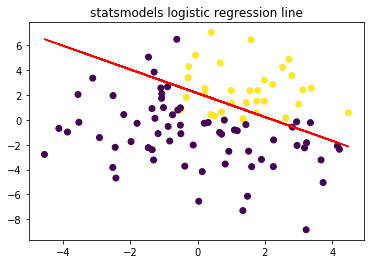

In [48]:
z3 = [-0.9463*v1/0.9884 + 2.1279/0.9884 for v1 in x1]

plt.scatter(x1,x2, c=ex_df['y'])
plt.plot(x1,z3, linestyle='-', color='r')
plt.title('statsmodels logistic regression line')

### Plot the line dividing the x1, x2 plane into the two regions, from the sklearn regression

Text(0.5,1,'sklearn logistic regression line')

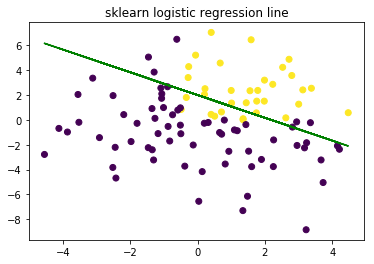

In [60]:
z4 = [-c1*v1/c2 - c0/c2 for v1 in x1]

plt.scatter(x1, x2, c=ex_df['y'])
plt.plot(x1, z4, linestyle='-', color='g', marker='')
plt.title('sklearn logistic regression line')

Use color-coding to show how likely each point is assessed to be in assigned region 

Text(0.5,1,'sklearn logistic regression')

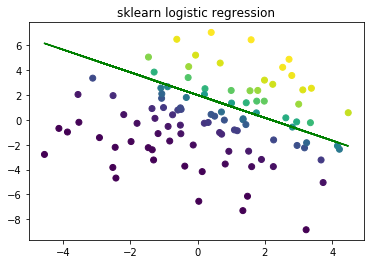

In [63]:

plt.scatter(x1, x2, c=y2)
plt.plot(x1, z4, linestyle='-', color='g', marker='')
plt.title('sklearn logistic regression')

Text(0.5,1,'statsmodels logistic regression line')

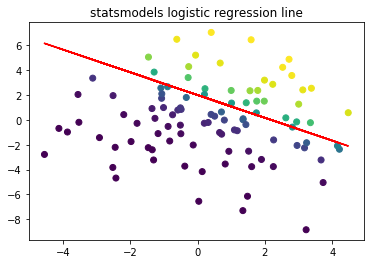

In [71]:
plt.scatter(x1,x2, c=y3)
plt.plot(x1,z3, linestyle='-', color='r')
plt.title('statsmodels logistic regression line')

Compare the two lines of division

In [74]:
print('statsmodels dividing line', [-0.9463/0.9884 , 2.1279/0.9884 ])
print('sklearn dividing line:   ',[-c1/c2, -c0/c2])

statsmodels dividing line [-0.957405908539053, 2.1528733306353702]
sklearn dividing line:    [-0.9160149016003833, 2.0038692032893697]


---
## Work through simple example of logistic regression using sklearn

taken from https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8


Dataset description is at https://archive.ics.uci.edu/ml/datasets/bank+marketing#

In [16]:
bank_df = pd.read_csv('data/banking.csv')

In [17]:
bank_df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [18]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [19]:
bank_df.iloc[0]

age                        44
job               blue-collar
marital               married
education            basic.4y
default               unknown
housing                   yes
loan                       no
contact              cellular
month                     aug
day_of_week               thu
duration                  210
campaign                    1
pdays                     999
previous                    0
poutcome          nonexistent
emp_var_rate              1.4
cons_price_idx         93.444
cons_conf_idx           -36.1
euribor3m               4.963
nr_employed            5228.1
y                           0
Name: 0, dtype: object

In [20]:
bank_df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'], dtype=object)

In [21]:
bank_df['education'].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

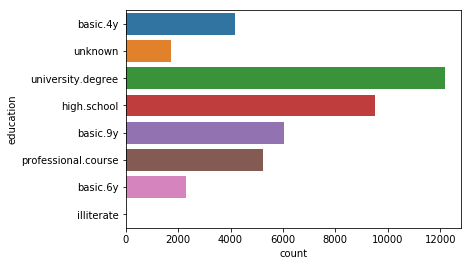

In [22]:
ax = sns.countplot(y='education', data=bank_df)

Aggregate all basic education into one category

In [23]:
bank_df['education'] = np.where(bank_df['education']=='basic.4y', 'basic', bank_df['education'])
bank_df['education'] = np.where(bank_df['education']=='basic.9y', 'basic', bank_df['education'])
bank_df['education'] = np.where(bank_df['education']=='basic.6y', 'basic', bank_df['education'])

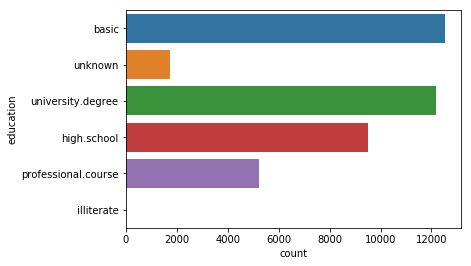

In [24]:
ax = sns.countplot(y='education', data=bank_df)

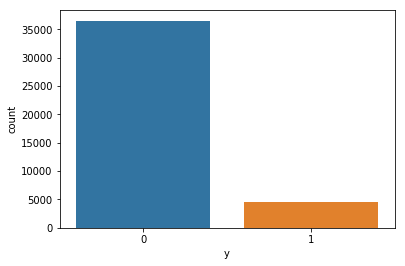

In [25]:
sns.countplot(x='y', data=bank_df)

In [26]:
bank_df.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [27]:
edu_df = pd.get_dummies(bank_df['education'], prefix='edu')

In [28]:
edu_df.head()

,edu_basic,edu_high.school,edu_illiterate,edu_professional.course,edu_university.degree,edu_unknown
0,1,0,0,0,0,0
1,0,0,0,0,0,1
2,0,0,0,0,1,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [29]:
#  get list of category variables

cat_cols = [\
'job',
'marital',
'education',             
'default',           
'housing',             
'loan',                
'contact',          
'month',                
'day_of_week',
'poutcome' ]     

# for each non-numeric (category) exogenous variable, create dummy variables for each unique value of the 
# category variable
bank2_df = bank_df.copy()
for name in cat_cols:
    cat_list = pd.get_dummies(bank_df[name], prefix=name)
    data1 = bank2_df.join(cat_list)
    bank2_df = data1
#end for




In [30]:
bank2_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,blue-collar,married,basic,unknown,yes,no,cellular,aug,thu,...,0,0,0,0,1,0,0,0,1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,0,0,1,0,0,0,0,0,1,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,0,0,0,0,1,0,0,0,0,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,0,0,1,0,0,0,0,0,1,0
4,55,retired,married,basic,no,yes,no,cellular,aug,fri,...,0,0,1,0,0,0,0,0,0,1


In [31]:
bank2_df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown',
       'default_yes', 'housing_no', 'housing_unknown', 'housing_yes',
       'loan_no', 'loan_unknown', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec',
 

In [32]:
#  initially have 72 variables to consider
bank2_df.columns.values.shape

(72,)

In [33]:
# now exclude the non-numeric variables  (ie exclude those column names in cat_cols list)

data_cols = bank2_df.columns.values.tolist()
to_keep = [ i for i in data_cols if i not in cat_cols]
data_final = bank2_df[to_keep]
print(data_final.columns.values)

['age' 'duration' 'campaign' 'pdays' 'previous' 'emp_var_rate'
 'cons_price_idx' 'cons_conf_idx' 'euribor3m' 'nr_employed' 'y'
 'job_admin.' 'job_blue-collar' 'job_entrepreneur' 'job_housemaid'
 'job_management' 'job_retired' 'job_self-employed' 'job_services'
 'job_student' 'job_technician' 'job_unemployed' 'job_unknown'
 'marital_divorced' 'marital_married' 'marital_single' 'marital_unknown'
 'education_basic' 'education_high.school' 'education_illiterate'
 'education_professional.course' 'education_university.degree'
 'education_unknown' 'default_no' 'default_unknown' 'default_yes'
 'housing_no' 'housing_unknown' 'housing_yes' 'loan_no' 'loan_unknown'
 'loan_yes' 'contact_cellular' 'contact_telephone' 'month_apr' 'month_aug'
 'month_dec' 'month_jul' 'month_jun' 'month_mar' 'month_may' 'month_nov'
 'month_oct' 'month_sep' 'day_of_week_fri' 'day_of_week_mon'
 'day_of_week_thu' 'day_of_week_tue' 'day_of_week_wed' 'poutcome_failure'
 'poutcome_nonexistent' 'poutcome_success']


In [110]:
#  Now have 62 variables to consider
data_final.columns.values.shape

(62,)

In [35]:
#  get all column names, y = dependent variable, X = independent variable names  (all others than'y')

data_final_cols = data_final.columns.values.tolist()
y = ['y']
X = [name for name in data_final_cols if name not in y ]

In [36]:
logreg = sklearn.linear_model.LogisticRegression()

#  prune estimators down to 18;  the y input parameter is expected to be a 1D array
rfe = sklearn.feature_selection.RFE(logreg, 18)
rfe = rfe.fit(data_final[X], data_final[y].values.ravel())

In [37]:
[print('{0:30} {1}'.format(name, v)) for name, v in zip(X,rfe.support_) if v];

previous                       True
euribor3m                      True
job_blue-collar                True
job_retired                    True
job_services                   True
job_student                    True
default_no                     True
contact_telephone              True
month_apr                      True
month_aug                      True
month_mar                      True
month_may                      True
month_nov                      True
day_of_week_mon                True
day_of_week_wed                True
poutcome_failure               True
poutcome_nonexistent           True
poutcome_success               True


In [38]:
[print('{0:30} {1}'.format(name, r)) for name, (r,v) in zip(X,zip(rfe.ranking_, rfe.support_)) if v];

previous                       1
euribor3m                      1
job_blue-collar                1
job_retired                    1
job_services                   1
job_student                    1
default_no                     1
contact_telephone              1
month_apr                      1
month_aug                      1
month_mar                      1
month_may                      1
month_nov                      1
day_of_week_mon                1
day_of_week_wed                1
poutcome_failure               1
poutcome_nonexistent           1
poutcome_success               1


In [39]:
[print('{0:30} {1}'.format(name, r)) for name, (r,v) in zip(X,zip(rfe.ranking_, rfe.support_)) if not v];

age                            35
duration                       33
campaign                       12
pdays                          40
emp_var_rate                   13
cons_price_idx                 17
cons_conf_idx                  16
nr_employed                    27
job_admin.                     11
job_entrepreneur               24
job_housemaid                  39
job_management                 42
job_self-employed              31
job_technician                 19
job_unemployed                 21
job_unknown                    41
marital_divorced               2
marital_married                3
marital_single                 4
marital_unknown                43
education_basic                6
education_high.school          7
education_illiterate           38
education_professional.course  8
education_university.degree    10
education_unknown              15
default_unknown                14
default_yes                    44
housing_no                     36
housing_unknown     

In [48]:
# get the 18 features RFE selected
rfe_cols = [name for name, v in zip(X,rfe.support_) if v];
rfe_X = data_final[rfe_cols]
rfe_y = data_final['y']

In [49]:
rfe_X.dtypes

previous                  int64
euribor3m               float64
job_blue-collar           uint8
job_retired               uint8
job_services              uint8
job_student               uint8
default_no                uint8
contact_telephone         uint8
month_apr                 uint8
month_aug                 uint8
month_mar                 uint8
month_may                 uint8
month_nov                 uint8
day_of_week_mon           uint8
day_of_week_wed           uint8
poutcome_failure          uint8
poutcome_nonexistent      uint8
poutcome_success          uint8
dtype: object

In [109]:
# now fit a logistic model

#rfe_X2 = sm.add_constant(rfe_X)
rfe_X2 = rfe_X.copy()
logit_model = sm.Logit(rfe_y, rfe_X2)
result = logit_model.fit_regularized()
print(result.summary())

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.28095808671743017
            Iterations: 101
            Function evaluations: 101
            Gradient evaluations: 101
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                41188
Model:                          Logit   Df Residuals:                    41170
Method:                           MLE   Df Model:                           17
Date:                Tue, 03 Apr 2018   Pseudo R-squ.:                  0.2019
Time:                        21:43:52   Log-Likelihood:                -11572.
converged:                       True   LL-Null:                       -14499.
                                        LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------

### Perform Log. Reg. on whole data set

In [58]:
logreg = sklearn.linear_model.LogisticRegression()
logreg.fit(rfe_X, rfe_y);

In [55]:
y_pred = logreg.predict(rfe_X);

In [56]:
logreg.score(rfe_X, rfe_y)

0.8993153345634651

In [57]:
sklearn.metrics.confusion_matrix(rfe_y, y_pred)

array([[36159,   389],
       [ 3758,   882]], dtype=int64)

### Perform Log. Reg. on partial (training) set, test on validation set

In [61]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(rfe_X, rfe_y, test_size=0.3, random_state=0)

In [62]:
logreg = sklearn.linear_model.LogisticRegression()
logreg.fit(X_train, y_train);

In [64]:
y_pred = logreg.predict(X_test)
logreg.score(X_test, y_test)

0.9019179412478757

In [65]:
sklearn.metrics.confusion_matrix(y_test, y_pred)

array([[10873,   108],
       [ 1104,   272]], dtype=int64)

In [67]:
print(sklearn.metrics.classification_report(y_test, y_pred)  )

             precision    recall  f1-score   support

          0       0.91      0.99      0.95     10981
          1       0.72      0.20      0.31      1376

avg / total       0.89      0.90      0.88     12357



In [68]:
logreg.coef_

array([[ 0.19104436, -0.49088294, -0.2095136 ,  0.37419382, -0.11170701,
         0.39567979,  0.29306163, -0.18006955, -0.51317968, -0.32564748,
         0.4756508 , -1.13787359, -0.40510227, -0.23439296,  0.13659496,
        -0.8267642 , -0.24084014,  0.9404796 ]])

In [69]:
logreg.intercept_

array([-0.12712474])